In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

np.random.seed(42)

In [2]:
df = pd.read_csv('02-Dataset/course_page_actions.csv')
df.head()

,timestamp,id,group,action,duration
0,2016-09-24 17:14:52.012145,261869,experiment,view,130.545004
1,2016-09-24 18:45:09.645857,226546,experiment,view,159.862440
2,2016-09-24 19:16:21.002533,286353,experiment,view,79.349315
3,2016-09-24 19:43:06.927785,842279,experiment,view,55.536126
4,2016-09-24 21:08:22.790333,781883,experiment,view,204.322437


In [12]:
views = df.query('action == "view"')

views.head()

,timestamp,id,group,action,duration
0,2016-09-24 17:14:52.012145,261869,experiment,view,130.545004
1,2016-09-24 18:45:09.645857,226546,experiment,view,159.862440
2,2016-09-24 19:16:21.002533,286353,experiment,view,79.349315
3,2016-09-24 19:43:06.927785,842279,experiment,view,55.536126
4,2016-09-24 21:08:22.790333,781883,experiment,view,204.322437


In [17]:
reading_times = views.groupby(['id','group']).mean()

reading_times = reading_times.reset_index()

reading_times.head()

,id,group,duration
0,183260,control,107.331484
1,183615,experiment,24.627594
2,184277,experiment,193.212489
3,184360,experiment,226.586283
4,184589,experiment,12.052097


In [20]:
# Get dataframe with all records from control group
control_df = reading_times.query('group == "control"').duration.mean()

# Get dataframe with all records from experiment group
experiment_df = reading_times.query('group == "experiment"').duration.mean()

# Printing.
control_df, experiment_df

(115.38637100678429, 131.3208410471793)

In [23]:
obs_diff = experiment_df - control_df

obs_diff

15.934470040395013

The experiment group spend 15 more seconds on the course overview.

In [35]:
# Create sampling distribution for difference in completion rates
# with boostrapping
diffs = []
for _ in range(10000):
    sample = df.sample(df.shape[0], replace = True)
    sample_control_df = sample.query('group == "control"')
    sample_control_ctr = sample_control_df.query('group == "control"').duration.mean()
    sample_experiment_df = sample.query('group == "experiment"')
    sample_experiment_ctr = sample_experiment_df.query('group == "experiment"').duration.mean()
    sample_obs_diff = sample_experiment_ctr - sample_control_ctr
    diffs.append(sample_obs_diff)

In [36]:
# convert to numpy array
diffs = np.array(diffs)

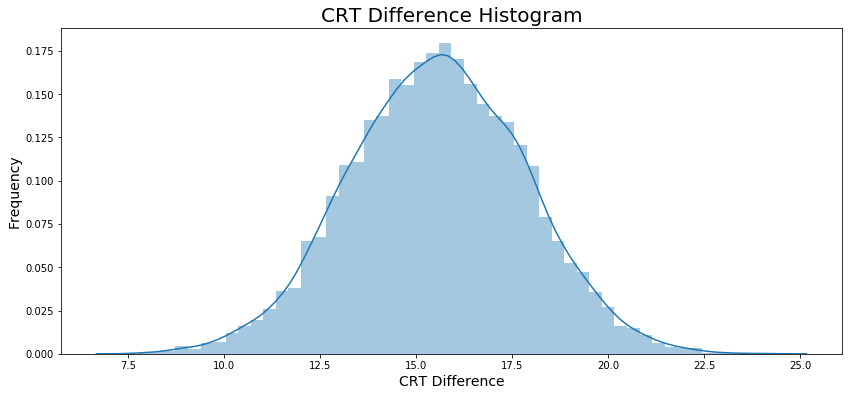

In [37]:
# plot distribution
# Plot sampling distribution
plt.figure(figsize = [14,6])
sns.distplot(diffs);
plt.title('CRT Difference Histogram', fontsize = 20)
plt.xlabel('CRT Difference', fontsize = 14)
plt.ylabel('Frequency', fontsize = 14)
plt.show()

In [38]:
# create distribution under the null hypothesis
null_vals = np.random.normal(0, np.std(diffs), size = 10000);

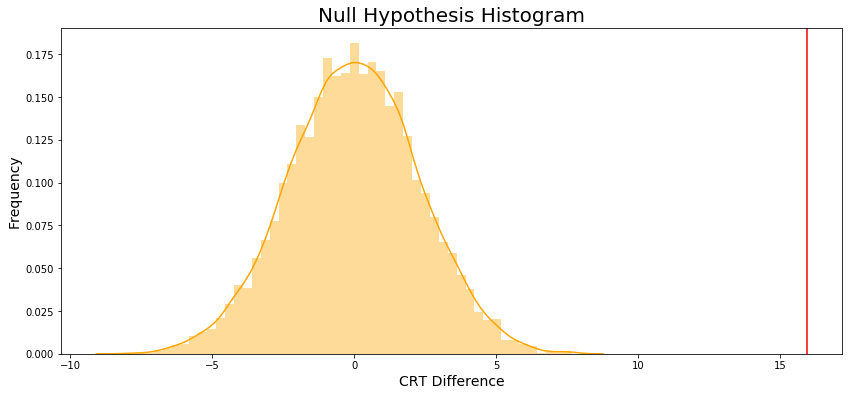

In [39]:
# plot null distribution
plt.figure(figsize = [14,6])
sns.distplot(null_vals, color = 'orange');
plt.title('Null Hypothesis Histogram', fontsize = 20)
plt.xlabel('CRT Difference', fontsize = 14)
plt.ylabel('Frequency', fontsize = 14)
plt.axvline(obs_diff, color = 'red')
plt.show()

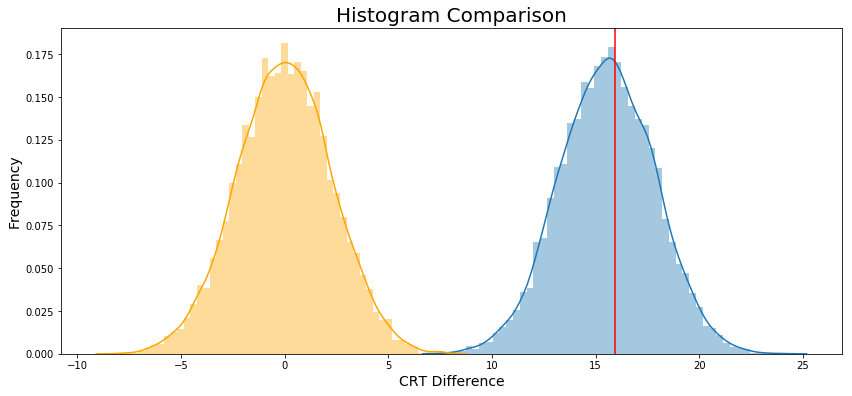

In [40]:
# Plot observed statistic with the null distibution
plt.figure(figsize = [14,6])
sns.distplot(diffs);
sns.distplot(null_vals, color = 'orange');
plt.title('Histogram Comparison', fontsize = 20)
plt.xlabel('CRT Difference', fontsize = 14)
plt.ylabel('Frequency', fontsize = 14)
plt.axvline(obs_diff, color = 'red')
plt.show()

In [41]:
# Compute p-value
p_value = (null_vals > obs_diff).mean()

# Printting the p_value
p_value

0.0

>**Conclusion:** Reject the $H_0$ because p_value < $\alpha$